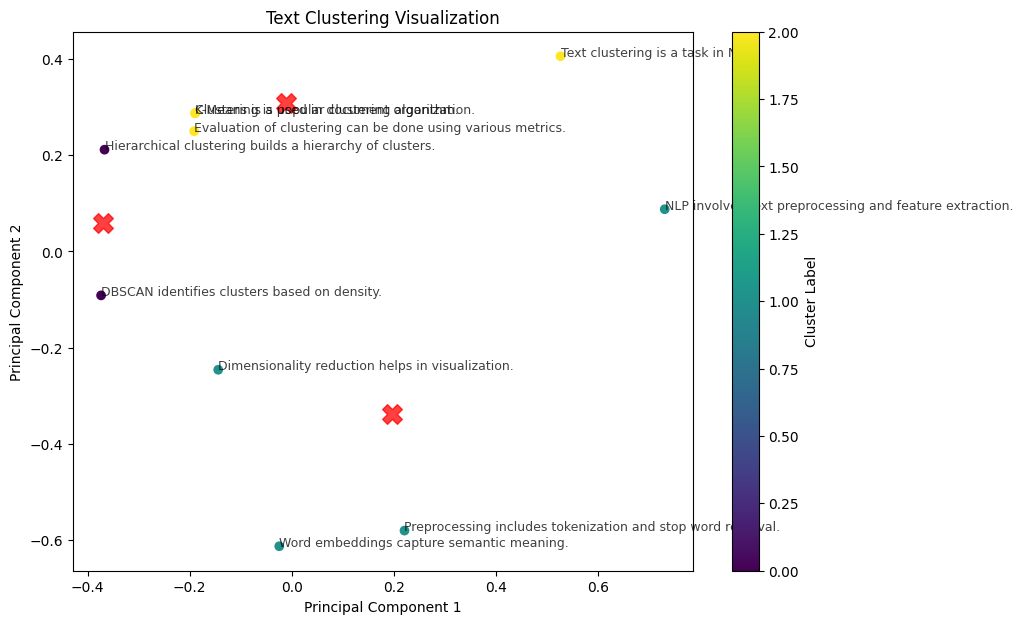

In [5]:
# # Step 1: Import necessary libraries
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# import numpy as np

# # Step 2: text data
# documents = [
#     "Text clustering is a task in NLP.",
#     "NLP involves text preprocessing and feature extraction.",
#     "K-Means is a popular clustering algorithm.",
#     "Evaluation of clustering can be done using various metrics.",
#     "Word embeddings capture semantic meaning.",
#     "Hierarchical clustering builds a hierarchy of clusters.",
#     "DBSCAN identifies clusters based on density.",
#     "Clustering is used in document organization.",
#     "Preprocessing includes tokenization and stop word removal.",
#     "Dimensionality reduction helps in visualization."
# ]

# # Step 3: Text Preprocessing and Feature Extraction using TF-IDF
# vectorizer = TfidfVectorizer(stop_words='english')
# X = vectorizer.fit_transform(documents)

# # Step 4: Dimensionality Reduction (optional, for visualization)
# pca = PCA(n_components=2)
# X_reduced = pca.fit_transform(X.toarray())

# # Step 5: Clustering using K-Means
# kmeans = KMeans(n_clusters=3, random_state=0)
# clusters = kmeans.fit_predict(X)

# # Step 6: Visualization
# plt.figure(figsize=(10, 7))
# scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis')
# plt.title("Text Clustering Visualization")
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")

# # Adding cluster centers to the plot
# centers = kmeans.cluster_centers_
# centers_reduced = pca.transform(centers)
# plt.scatter(centers_reduced[:, 0], centers_reduced[:, 1], c='red', s=200, alpha=0.75, marker='X')

# # Adding labels to the plot
# for i, txt in enumerate(documents):
#     plt.annotate(txt, (X_reduced[i, 0], X_reduced[i, 1]), fontsize=9, alpha=0.75)

# plt.colorbar(scatter, label='Cluster Label')
# plt.show()

In [13]:
import spacy
import json

# Load the English language model from spaCy
nlp = spacy.load('en_core_web_sm')

def extract_key_sentences(text):
    # Process the text using spaCy
    doc = nlp(text)
    # Extract sentences from the text
    sentences = [sent.text.strip() for sent in doc.sents]

    # Return sentences as a list
    return sentences

# Text to process
text = """
Hi! My name is Ethan I am 7 years old My family has 4 members: my father my mother my younger sister and me My father is an engineer He is 40 years old Currently he works in the factory near my house so he doesn’t have to go so far to work And my mother is 37 years old now She is a literature teacher at Amsterdam high school it’s also the old school where she studied a few years ago Her students love her so much because she is a kind teacher My younger sister is named Lisa She is 2 years old she is just a baby Everyone in my family loves her very much because she is very lovely and obedient She is very cute and I always take care of her whenever I finish my homework I love my family very much
"""

# Extract sentences
sentences = extract_key_sentences(text)

# Print the sentences list
print(sentences)

['Hi!', 'My name is Ethan I am 7 years old My family has 4 members: my father my mother my younger sister and me', 'My father is an engineer He is 40 years old', 'Currently he works in the factory near my house so he doesn’t have to go so far to work', 'And my mother is 37 years old now', 'She is a literature teacher at Amsterdam high school it’s also the old school where she studied a few years ago Her students love her so much because she is a kind teacher My younger sister is named', 'Lisa She is 2 years old she is just a baby Everyone in my family loves her very much because she is very lovely and obedient She is very cute and I always take care of her whenever I finish my homework I love my family very much']


A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

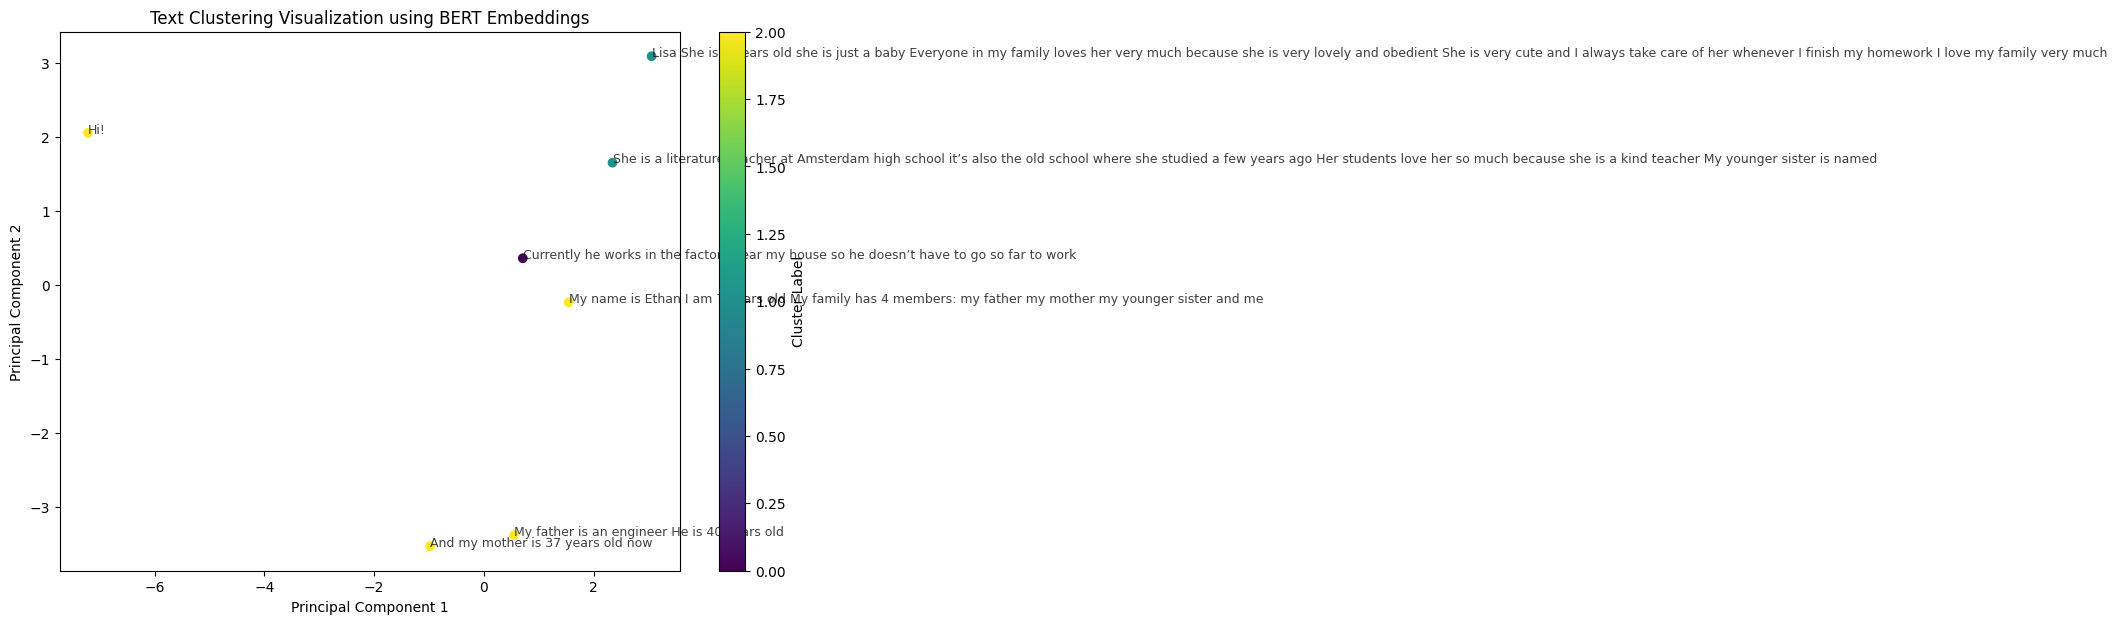

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import torch
from transformers import AutoTokenizer, AutoModel
import spacy
import warnings
warnings.filterwarnings("ignore")

# Load tokenizer and BERT model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

def get_embedding(text, tokenizer, model):
    # Encode text with padding and truncation
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        output = model(**inputs)
        # Get text embedding by averaging token embeddings
        embedding = output.last_hidden_state.mean(dim=1)
    return embedding

# Load spaCy model and extract sentences
nlp = spacy.load('en_core_web_sm')

def extract_key_sentences(text):
    doc = nlp(text)
    sentences = [sent.text.strip() for sent in doc.sents]
    return sentences

# Example text
text = """
Hi! My name is Ethan I am 7 years old My family has 4 members: my father my mother my younger sister and me My father is an engineer He is 40 years old Currently he works in the factory near my house so he doesn’t have to go so far to work And my mother is 37 years old now She is a literature teacher at Amsterdam high school it’s also the old school where she studied a few years ago Her students love her so much because she is a kind teacher My younger sister is named Lisa She is 2 years old she is just a baby Everyone in my family loves her very much because she is very lovely and obedient She is very cute and I always take care of her whenever I finish my homework I love my family very much
"""

# Extract sentences from the text
sentences = extract_key_sentences(text)

# Extract embeddings for all sentences
embeddings = torch.vstack([get_embedding(sent, tokenizer, model) for sent in sentences])

# Convert embeddings to numpy array for clustering
X = embeddings.numpy()

# Dimensionality Reduction (optional, for visualization)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Clustering using K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X)

# Visualization
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis')
plt.title("Text Clustering Visualization using BERT Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Adding cluster centers to the plot
centers = kmeans.cluster_centers_
centers_reduced = pca.transform(centers)
# plt.scatter(centers_reduced[:, 0], centers_reduced[:, 1], c='red', s=200, alpha=0.75, marker='X')

# Adding labels to the plot
for i, txt in enumerate(sentences):
    plt.annotate(txt, (X_reduced[i, 0], X_reduced[i, 1]), fontsize=9, alpha=0.75)

plt.colorbar(scatter, label='Cluster Label')
plt.show()


In [27]:
print(sentences)

['Hi!', 'My name is Ethan I am 7 years old My family has 4 members: my father my mother my younger sister and me', 'My father is an engineer He is 40 years old', 'Currently he works in the factory near my house so he doesn’t have to go so far to work', 'And my mother is 37 years old now', 'She is a literature teacher at Amsterdam high school it’s also the old school where she studied a few years ago Her students love her so much because she is a kind teacher My younger sister is named', 'Lisa She is 2 years old she is just a baby Everyone in my family loves her very much because she is very lovely and obedient She is very cute and I always take care of her whenever I finish my homework I love my family very much']
